In [ ]:
# Code to Basic Multi Layer Perceptron

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("data.csv")

In [ ]:
#Exploring the data

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Dropping unwanted columns

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Using One hot Encoding to Convert Categorical to Numercial Variables

In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
df=df.drop(columns=['Geography_Spain','Gender_Male','Surname'])

In [ ]:
# Scaling the Values to have goood prediction

In [ ]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [ ]:
X.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
y.shape

(10000,)

In [ ]:
from pandas.core.array_algos.replace import Scalar
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
X_scaled[1].shape

(11,)

In [ ]:
# SPlitting data into Train and Test
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2)

In [ ]:
#Initializing the model

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
from keras.engine.training import optimizer
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
performannce=model.fit(X_train,y_train,epochs=20,batch_size=50,validation_split=0.2)

Epoch 1/20
128/128 [==============================] - 1s 2ms/step - loss: 0.9481 - accuracy: 0.2341 - val_loss: 0.6833 - val_accuracy: 0.5931
Epoch 2/20
128/128 [==============================] - 0s 1ms/step - loss: 0.5822 - accuracy: 0.7861 - val_loss: 0.5148 - val_accuracy: 0.8075
Epoch 3/20
128/128 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.7952 - val_loss: 0.4779 - val_accuracy: 0.8075
Epoch 4/20
128/128 [==============================] - 0s 1ms/step - loss: 0.4858 - accuracy: 0.7952 - val_loss: 0.4664 - val_accuracy: 0.8075
Epoch 5/20
128/128 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7952 - val_loss: 0.4580 - val_accuracy: 0.8075
Epoch 6/20
128/128 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7952 - val_loss: 0.4504 - val_accuracy: 0.8075
Epoch 7/20
128/128 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.7952 - val_loss: 0.4427 - val_accuracy: 0.8075
Epoch 

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
y_train.shape

(8000,)

In [ ]:
#predicting the model

In [ ]:
y_pred=model.predict(X_test)

63/63 [==============================] - 0s 755us/step


In [ ]:
y_pred=y_pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.791

In [ ]:
# Scaling should also be done on Y Values

In [ ]:
import matplotlib.pyplot as plt

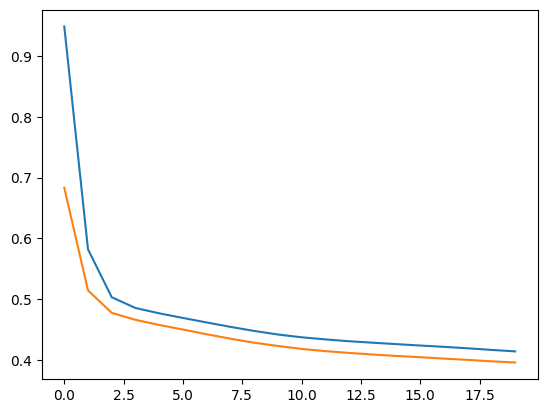

In [ ]:
plt.plot(performannce.history['loss'])
plt.plot(performannce.history['val_loss'])

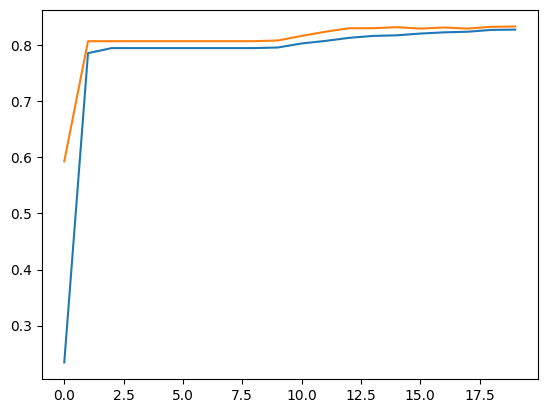

In [ ]:
plt.plot(performannce.history['accuracy'])
plt.plot(performannce.history['val_accuracy'])